Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
#read the data
data=pd.read_csv('book.csv')
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


#### Data are already given in TransactionEncoder format

In [4]:
data.sum()

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
count = data.sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [7]:
# Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


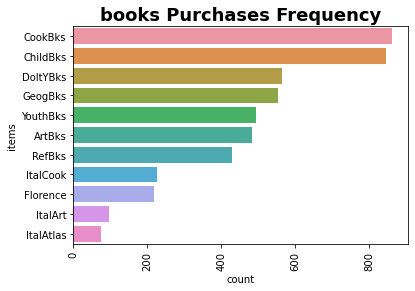

In [8]:
#visualization of movies data
pal = sns.color_palette("pastel")
count = count.sort_values(by='count', ascending=False)
sns.barplot(x=count['count'], y=count['items'])
plt.xticks(rotation = 90, fontsize = 10) 
plt.title('books Purchases Frequency',  fontsize = 18, fontweight = 'bold')
plt.show()

## Implementation of Apriori Algorithem

In [9]:
# finding support and length for itemsets with minimum support of 0.1 
frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

C:\Users\hmaca\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


### At minimum support of 0.1 we obtained 3-item itemset

In [10]:
# Finding confidence for rules obtained with minimum support of 0.1
conf=[]
confidence=0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
for n in confidence:
    rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=n)
    rules.sort_values('lift',ascending=False)
    lift=rules[rules.lift>=1]
    print('No. of rules with confidence ',n,'is',rules['confidence'].count(),
          'and no. of lift for those rules with ratio>=1 is',lift['lift'].count())
    conf.append(rules)

No. of rules with confidence  0.3 is 89 and no. of lift for those rules with ratio>=1 is 89
No. of rules with confidence  0.4 is 70 and no. of lift for those rules with ratio>=1 is 70
No. of rules with confidence  0.5 is 49 and no. of lift for those rules with ratio>=1 is 49
No. of rules with confidence  0.6 is 30 and no. of lift for those rules with ratio>=1 is 30
No. of rules with confidence  0.7 is 19 and no. of lift for those rules with ratio>=1 is 19
No. of rules with confidence  0.8 is 6 and no. of lift for those rules with ratio>=1 is 6
No. of rules with confidence  0.9 is 1 and no. of lift for those rules with ratio>=1 is 1
No. of rules with confidence  1 is 1 and no. of lift for those rules with ratio>=1 is 1


In [11]:
len(conf)

8

### Visualization of obtained rules

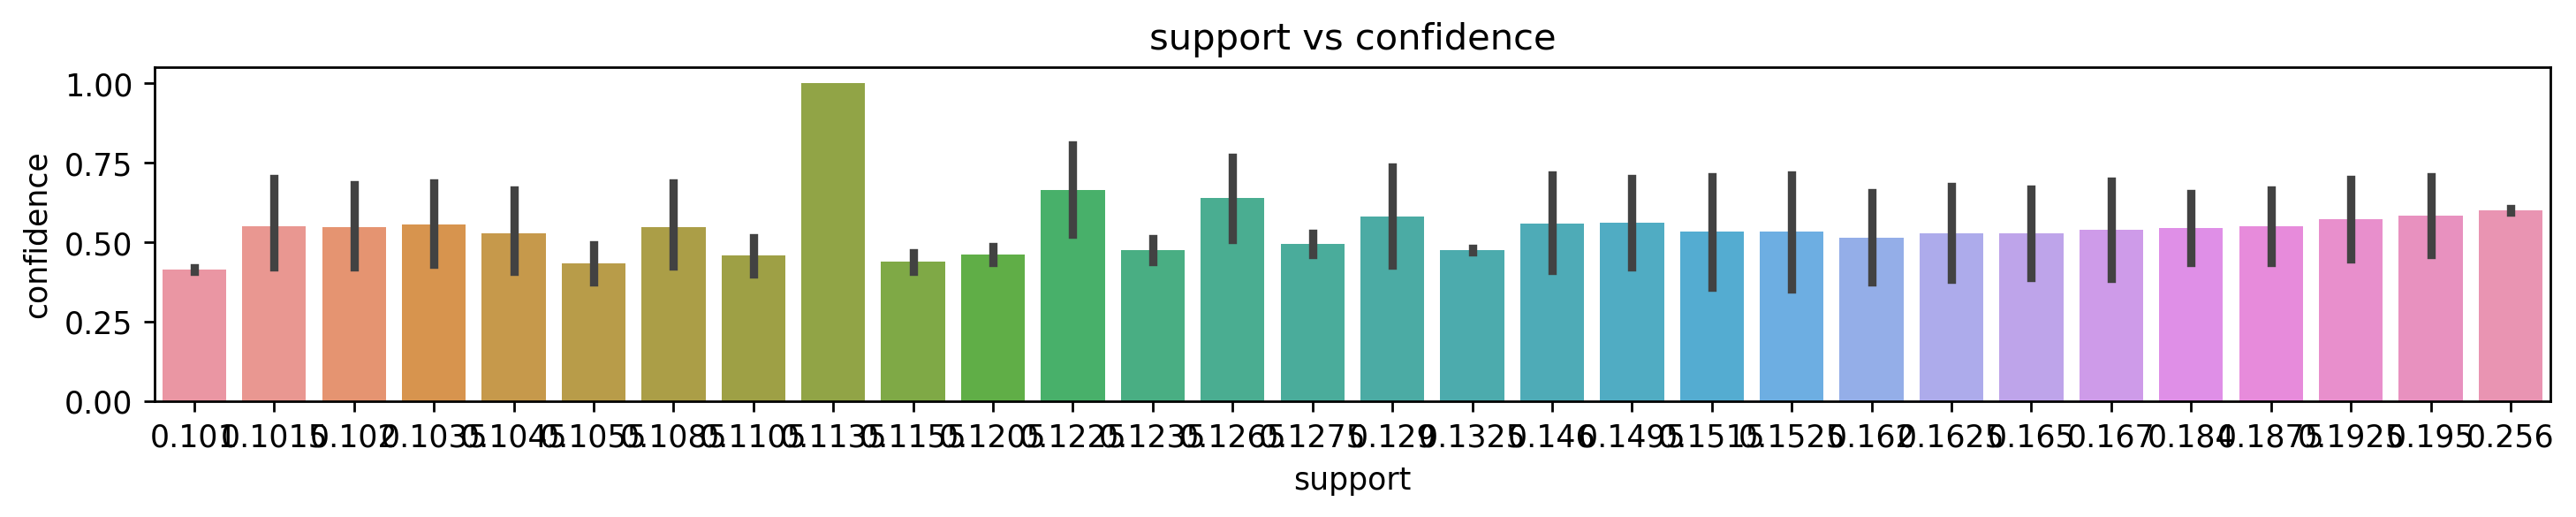

None


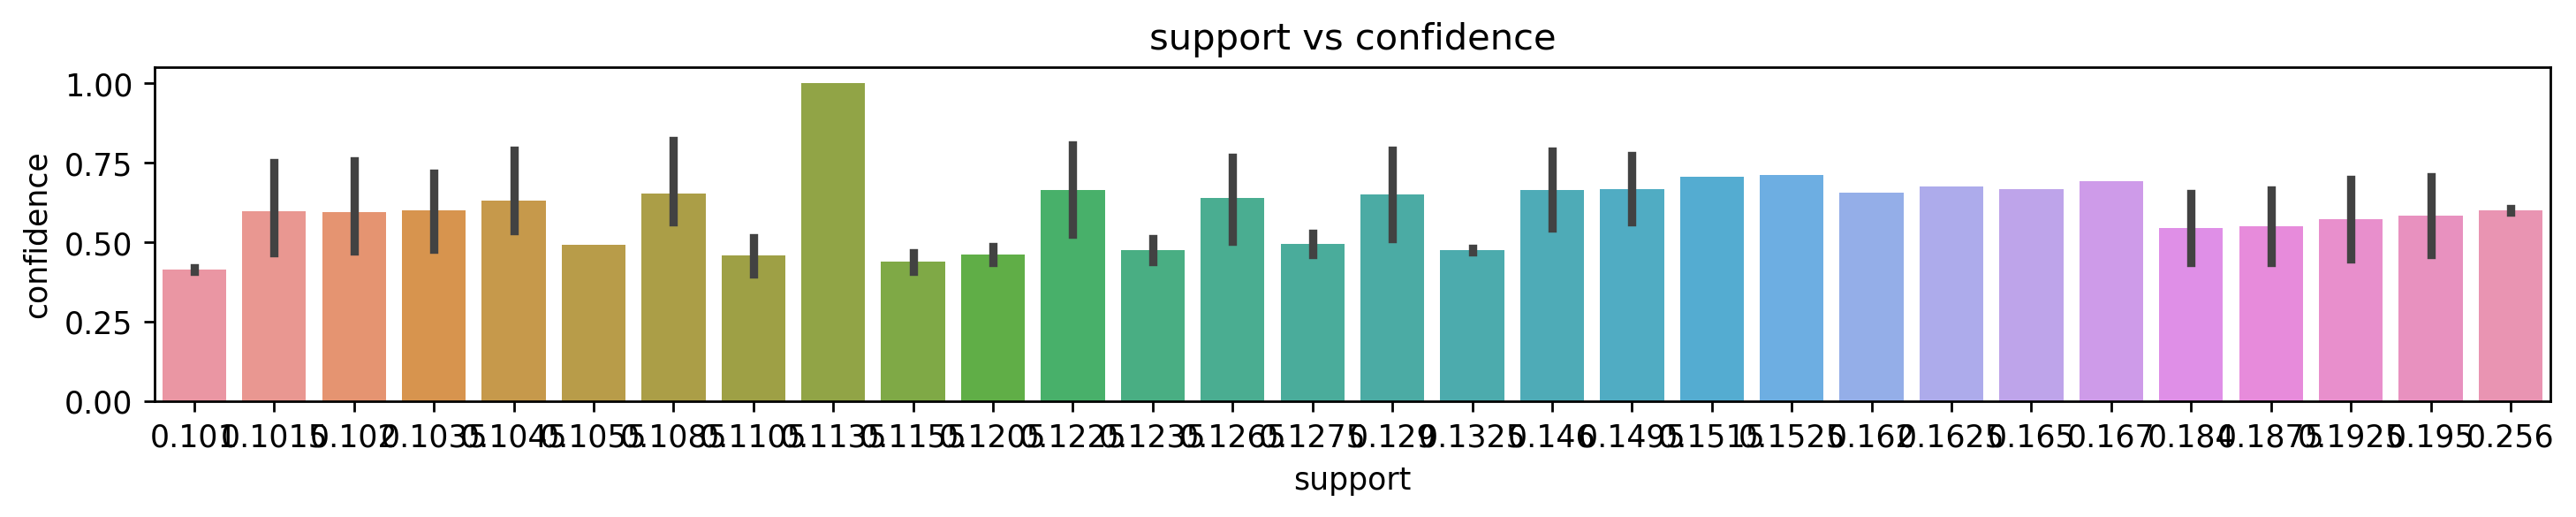

None


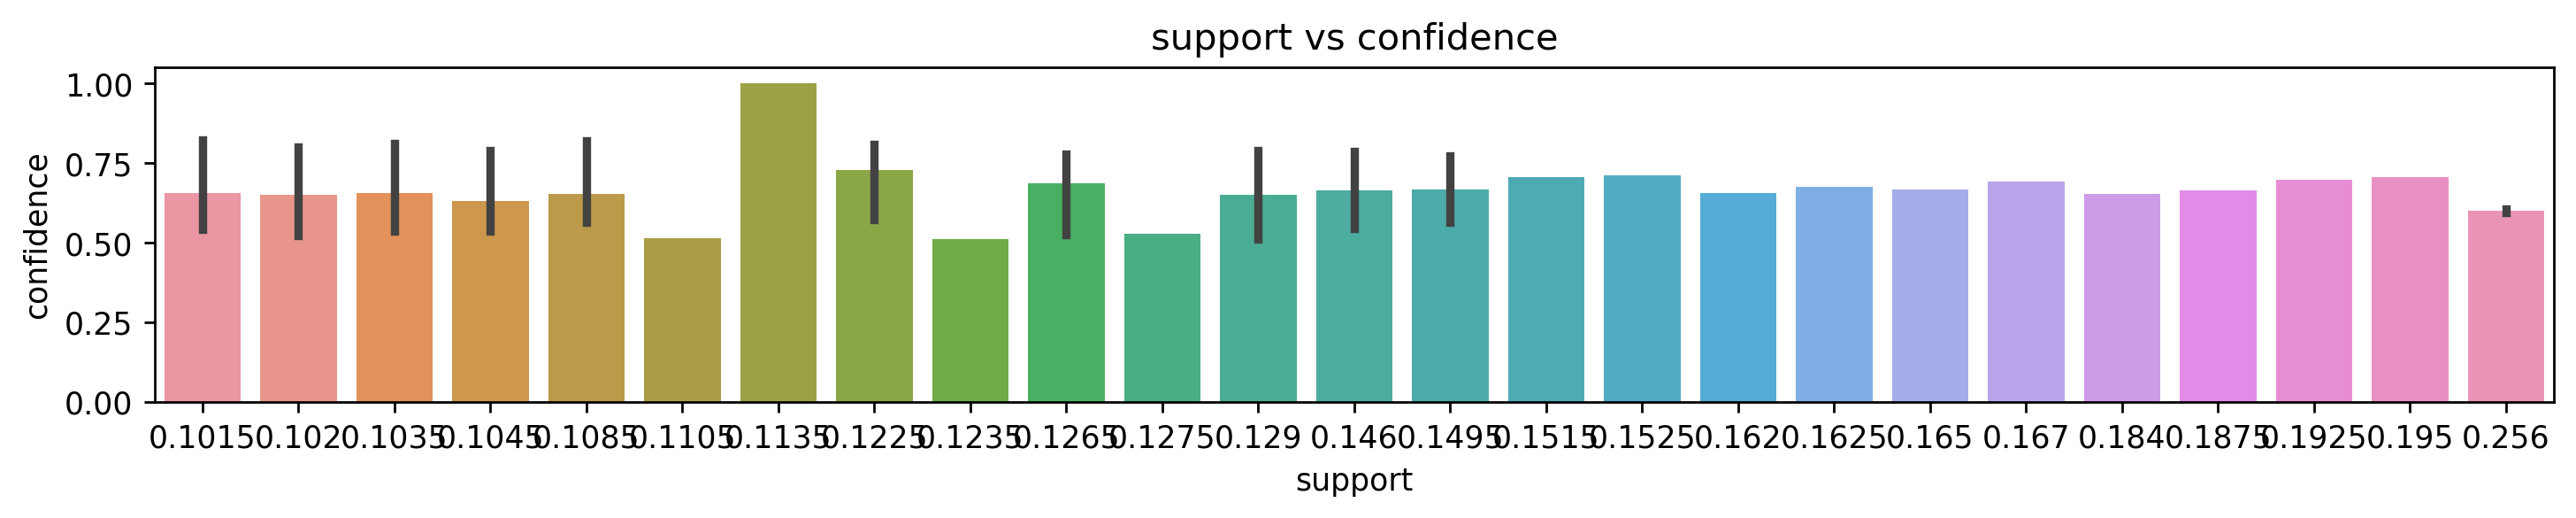

None


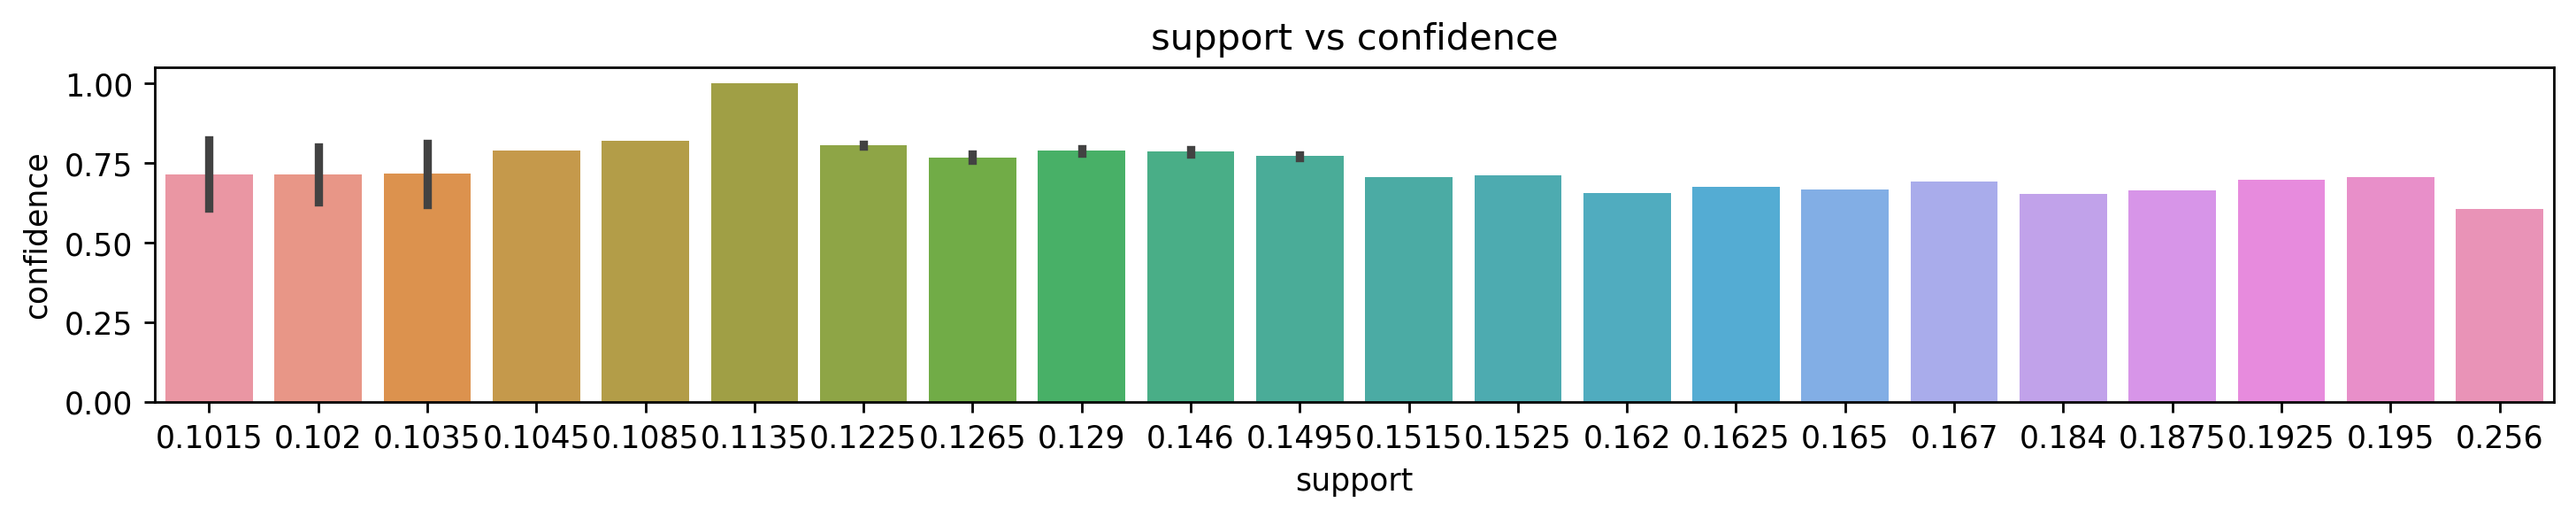

None


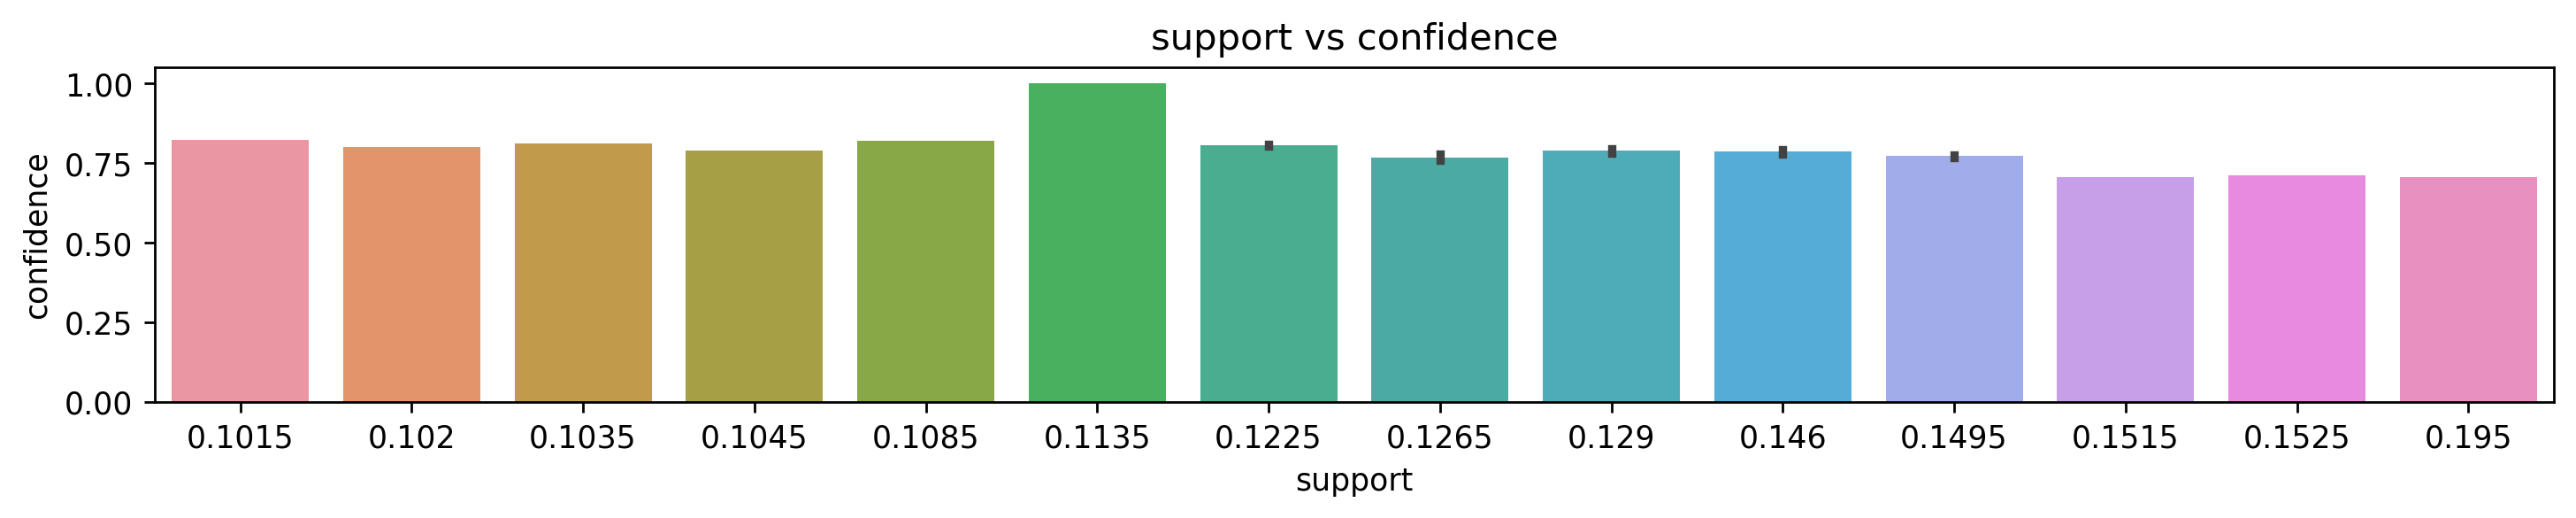

None


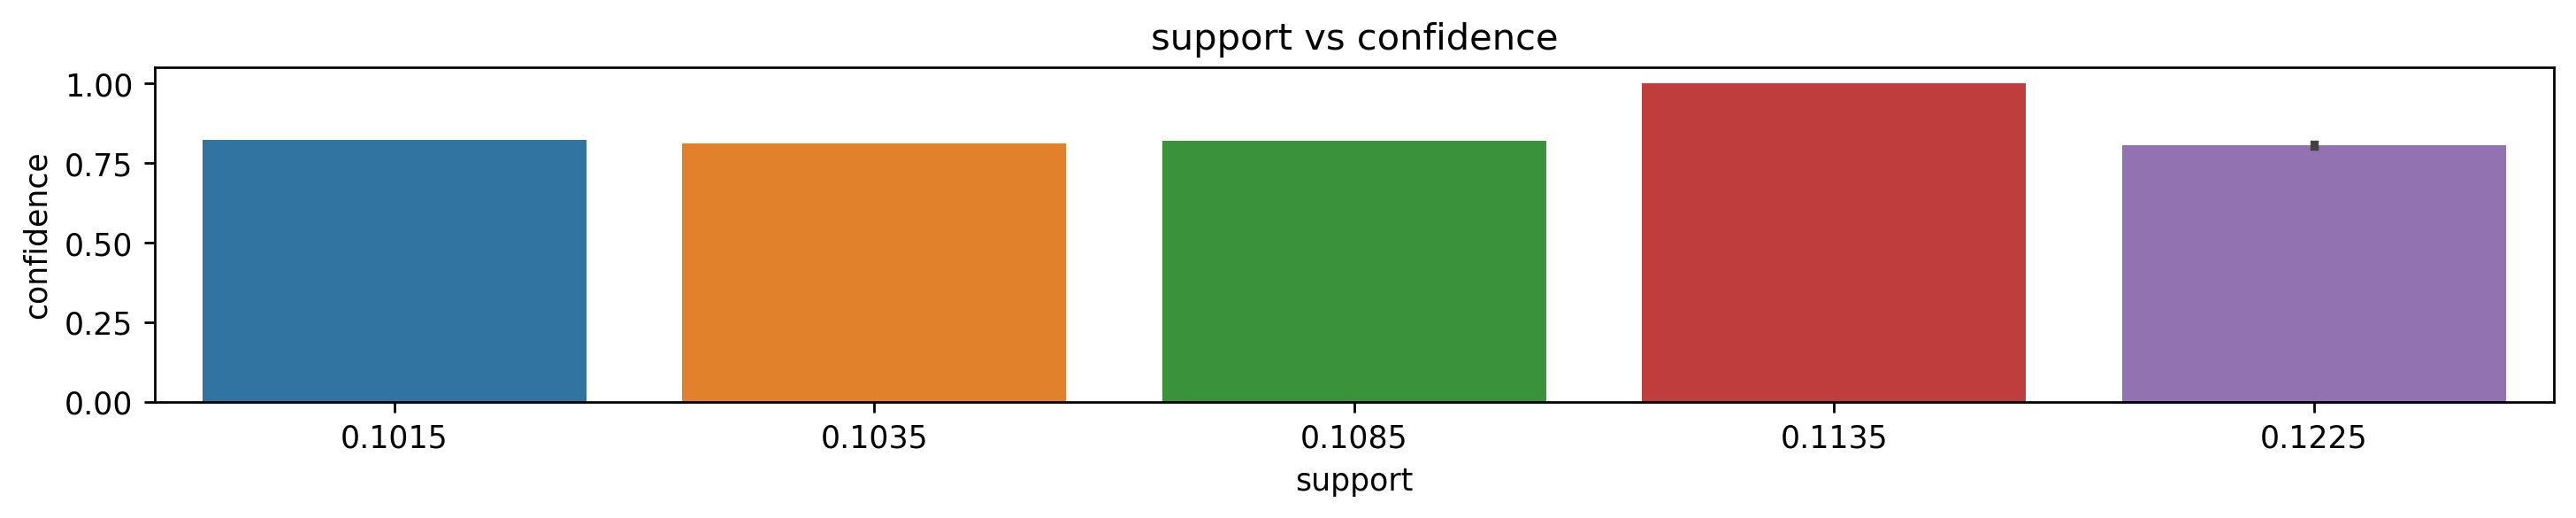

None


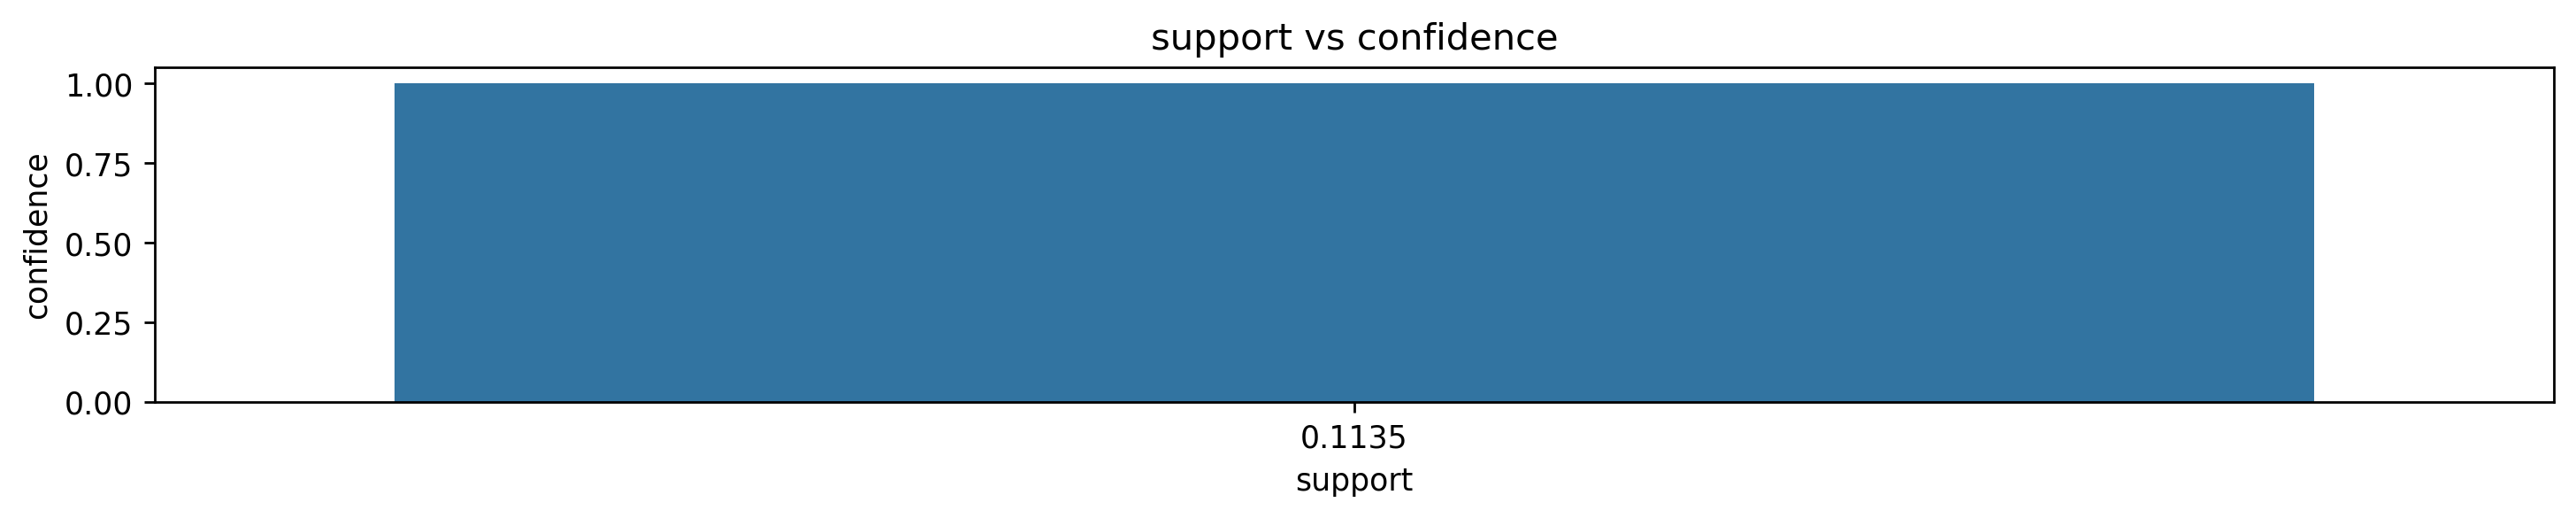

None


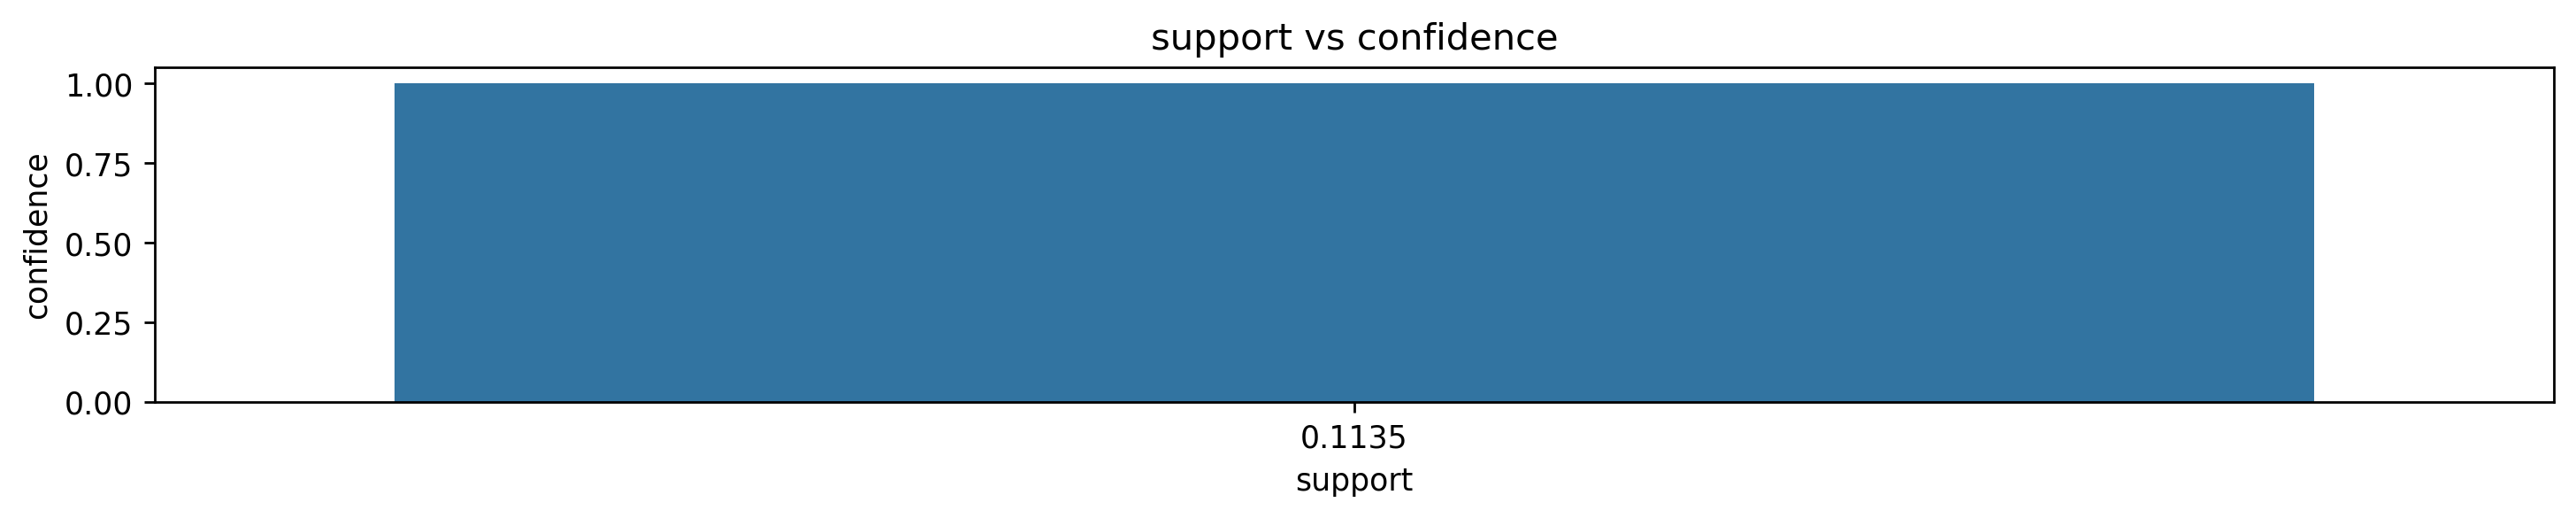

None


In [12]:
# Barplot for confidence vs support
lent=0,1,2,3,4,5,6,7
for i in lent:
    plt.figure(figsize=(14,2),dpi=250)
    sns.barplot("support","confidence",data=conf[i])
    plt.title("support vs confidence")
    print(plt.show())

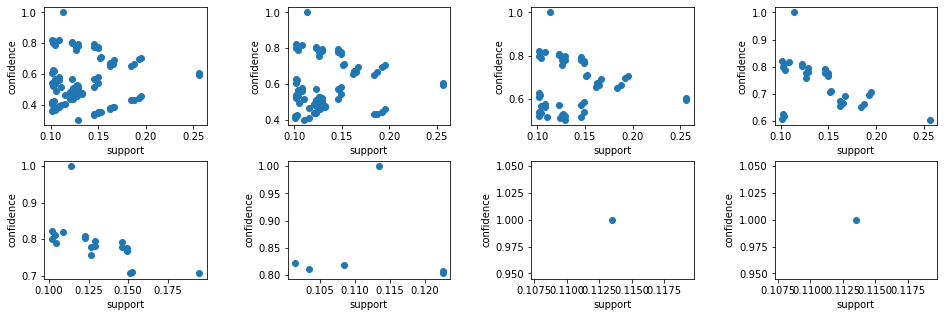

In [13]:
#scatter plot for visualization of relation between confidence and support
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8) = axes
ax1.scatter(conf[0]['support'],conf[0]['confidence']),ax1.set_xlabel('support'),ax1.set_ylabel('confidence')
ax2.scatter(conf[1]['support'],conf[1]['confidence']),ax2.set_xlabel('support'),ax2.set_ylabel('confidence')
ax3.scatter(conf[2]['support'],conf[2]['confidence']),ax3.set_xlabel('support'),ax3.set_ylabel('confidence')
ax4.scatter(conf[3]['support'],conf[3]['confidence']),ax4.set_xlabel('support'),ax4.set_ylabel('confidence')
ax5.scatter(conf[4]['support'],conf[4]['confidence']),ax5.set_xlabel('support'),ax5.set_ylabel('confidence')
ax6.scatter(conf[5]['support'],conf[5]['confidence']),ax6.set_xlabel('support'),ax6.set_ylabel('confidence')
ax7.scatter(conf[6]['support'],conf[6]['confidence']),ax7.set_xlabel('support'),ax7.set_ylabel('confidence')
ax8.scatter(conf[7]['support'],conf[7]['confidence']),ax8.set_xlabel('support'),ax8.set_ylabel('confidence')
plt.show()

C:\Users\hmaca\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\hmaca\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(Text(0.5, 0, 'lift'),
 Text(0, 0.5, 'Confidence'),
 Text(0.5, 1.0, 'lift vs Confidence'))

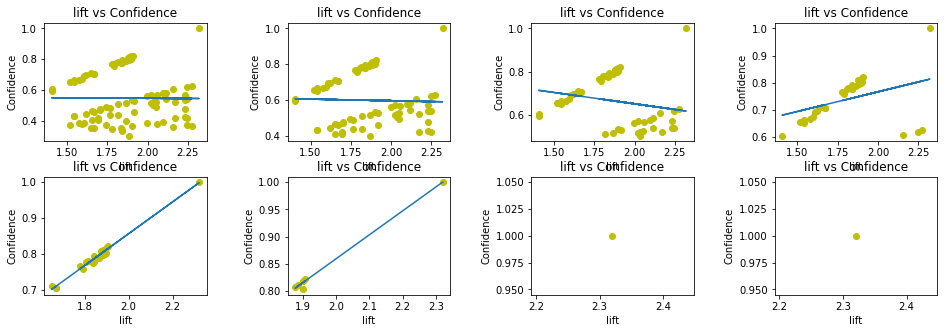

In [14]:
# polt of relatiob between confidence and lift
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8) = axes 
fit = np.polyfit(conf[0]['lift'], conf[0]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax1.plot(conf[0]['lift'], conf[0]['confidence'], 'yo', conf[0]['lift'],fit_fn(conf[0]['lift']))
ax1.set_xlabel('lift'),ax1.set_ylabel('Confidence'),ax1.set_title('lift vs Confidence')
fit = np.polyfit(conf[1]['lift'], conf[1]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax2.plot(conf[1]['lift'], conf[1]['confidence'], 'yo', conf[1]['lift'],fit_fn(conf[1]['lift']))
ax2.set_xlabel('lift'),ax2.set_ylabel('Confidence'),ax2.set_title('lift vs Confidence')
fit = np.polyfit(conf[2]['lift'], conf[2]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax3.plot(conf[2]['lift'], conf[2]['confidence'], 'yo', conf[2]['lift'],fit_fn(conf[2]['lift']))
ax3.set_xlabel('lift'),ax3.set_ylabel('Confidence'),ax3.set_title('lift vs Confidence')
fit = np.polyfit(conf[3]['lift'], conf[3]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax4.plot(conf[3]['lift'], conf[3]['confidence'], 'yo', conf[3]['lift'],fit_fn(conf[3]['lift']))
ax4.set_xlabel('lift'),ax4.set_ylabel('Confidence'),ax4.set_title('lift vs Confidence')
fit = np.polyfit(conf[4]['lift'], conf[4]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax5.plot(conf[4]['lift'], conf[4]['confidence'], 'yo', conf[4]['lift'],fit_fn(conf[4]['lift']))
ax5.set_xlabel('lift'),ax5.set_ylabel('Confidence'),ax5.set_title('lift vs Confidence')
fit = np.polyfit(conf[5]['lift'], conf[5]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax6.plot(conf[5]['lift'], conf[5]['confidence'], 'yo', conf[5]['lift'],fit_fn(conf[5]['lift']))
ax6.set_xlabel('lift'),ax6.set_ylabel('Confidence'),ax6.set_title('lift vs Confidence')
fit = np.polyfit(conf[6]['lift'], conf[6]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax7.plot(conf[6]['lift'], conf[6]['confidence'], 'yo', conf[6]['lift'],fit_fn(conf[6]['lift']))
ax7.set_xlabel('lift'),ax7.set_ylabel('Confidence'),ax7.set_title('lift vs Confidence')
fit = np.polyfit(conf[7]['lift'], conf[7]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax8.plot(conf[7]['lift'], conf[7]['confidence'], 'yo', conf[7]['lift'],fit_fn(conf[7]['lift']))
ax8.set_xlabel('lift'),ax8.set_ylabel('Confidence'),ax8.set_title('lift vs Confidence')

In [15]:
# finding support and length for itemsets with minimum support of 0.15
frequent_itemsets1=apriori(data,min_support=0.15,use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

C:\Users\hmaca\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1650,"(YouthBks, ChildBks)",2
8,0.2560,"(ChildBks, CookBks)",2
9,0.1840,"(DoItYBks, ChildBks)",2


### At minimum support of 0.15 we obtained 2-item itemset

In [16]:
# Finding confidence for rules obtained with minimum support of 0.1.5
conf1=[]
confidence=0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
for n in confidence:
    rules1 = association_rules(frequent_itemsets1,metric='confidence', min_threshold=n)
    rules1.sort_values('lift',ascending=False)
    lift=rules1[rules1.lift>=1]
    print('No. of rules with confidence ',n,'is',rules1['confidence'].count(),
          'and no. of lift for those rules with ratio>=1 is',lift['lift'].count())
    conf1.append(rules1)

No. of rules with confidence  0.3 is 22 and no. of lift for those rules with ratio>=1 is 22
No. of rules with confidence  0.4 is 16 and no. of lift for those rules with ratio>=1 is 16
No. of rules with confidence  0.5 is 12 and no. of lift for those rules with ratio>=1 is 12
No. of rules with confidence  0.6 is 11 and no. of lift for those rules with ratio>=1 is 11
No. of rules with confidence  0.7 is 3 and no. of lift for those rules with ratio>=1 is 3
No. of rules with confidence  0.8 is 0 and no. of lift for those rules with ratio>=1 is 0
No. of rules with confidence  0.9 is 0 and no. of lift for those rules with ratio>=1 is 0
No. of rules with confidence  1 is 0 and no. of lift for those rules with ratio>=1 is 0


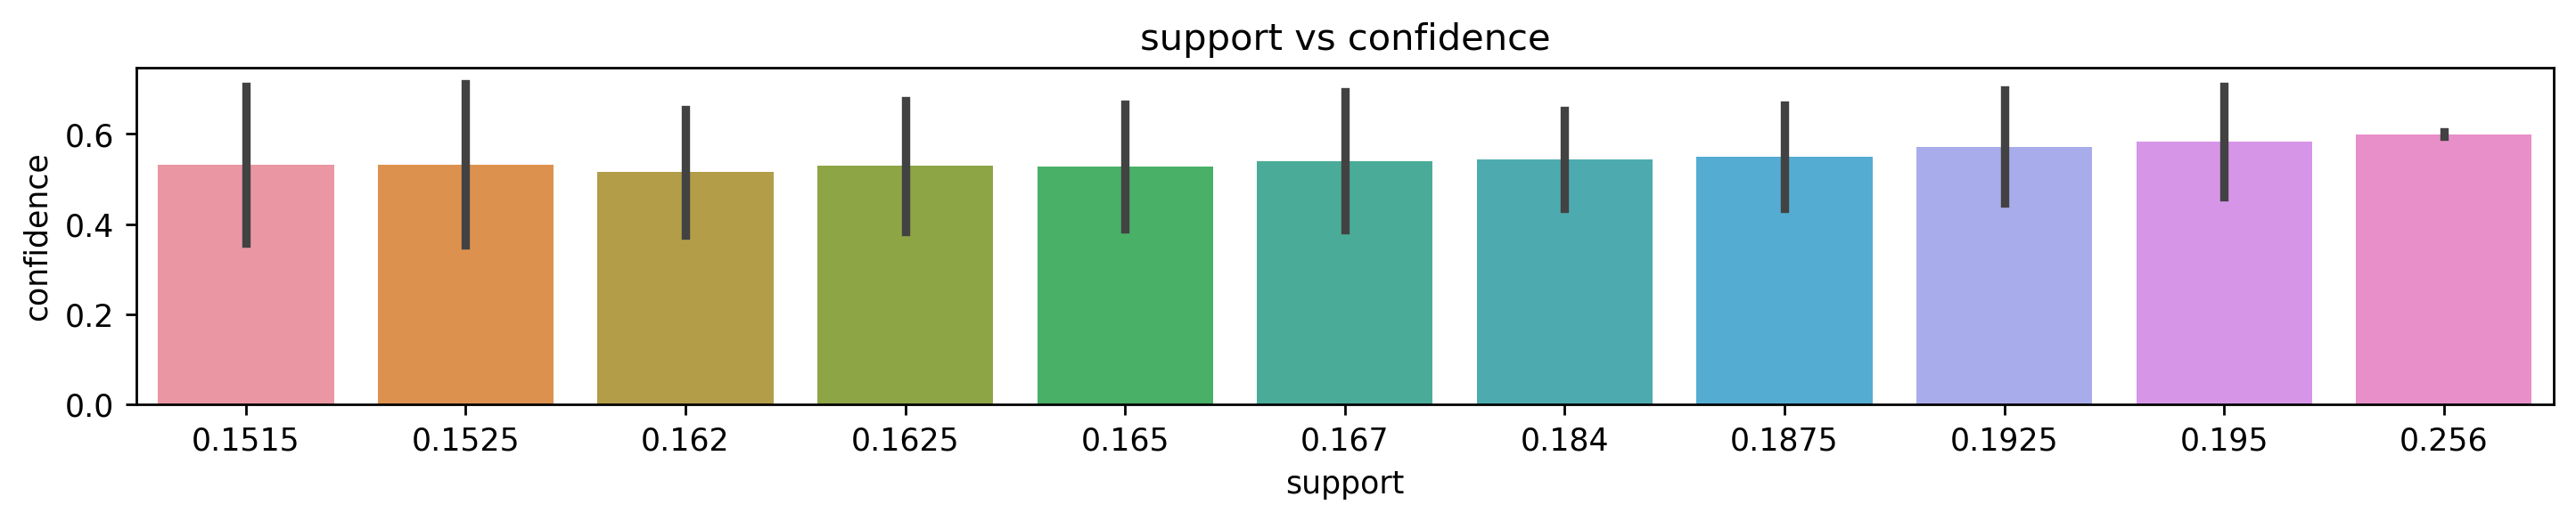

None


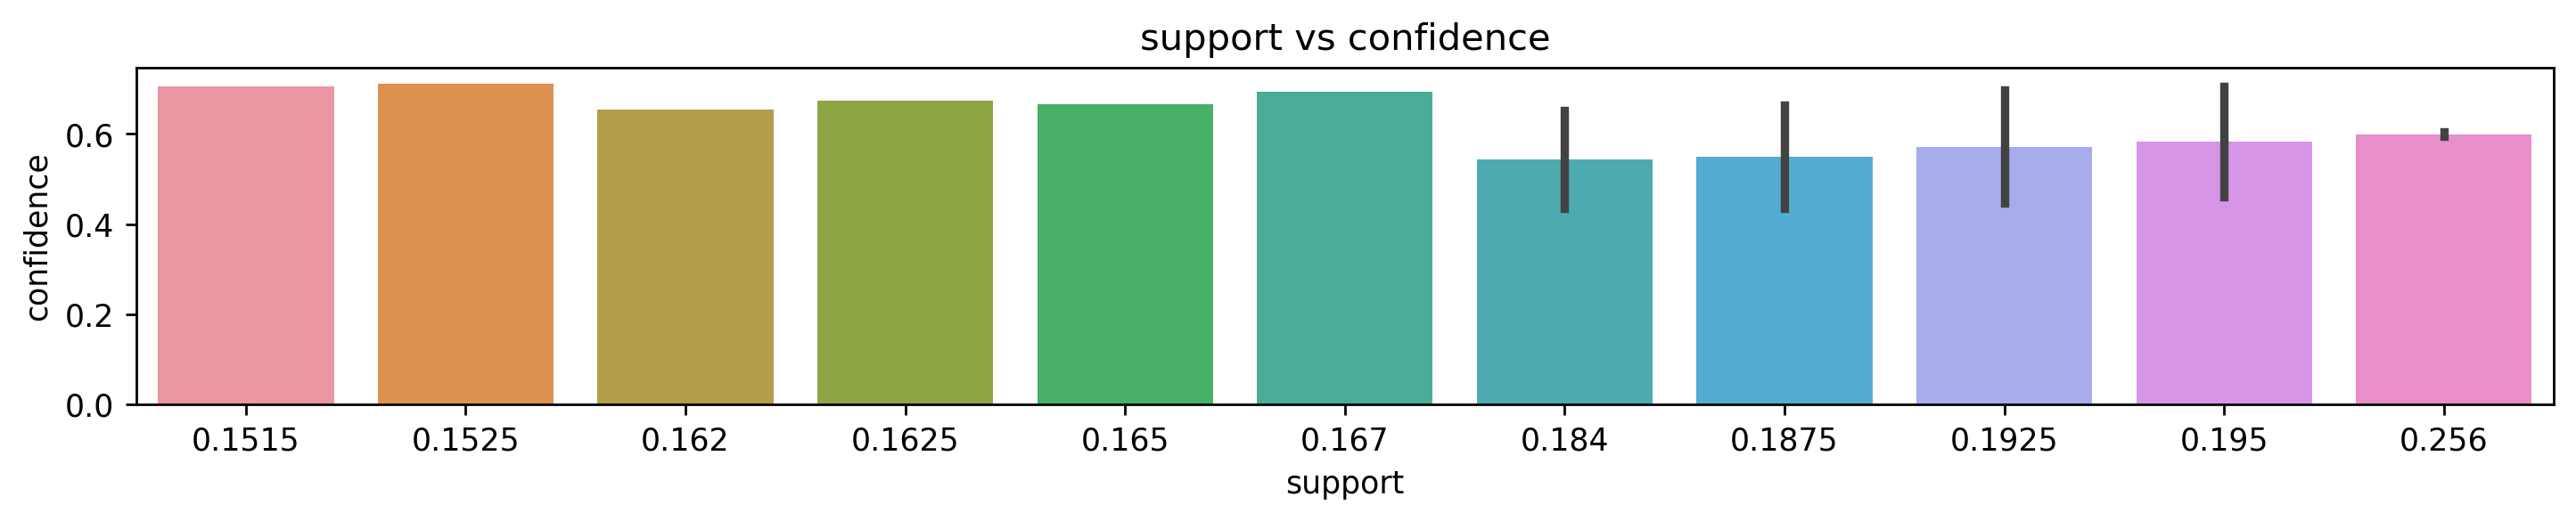

None


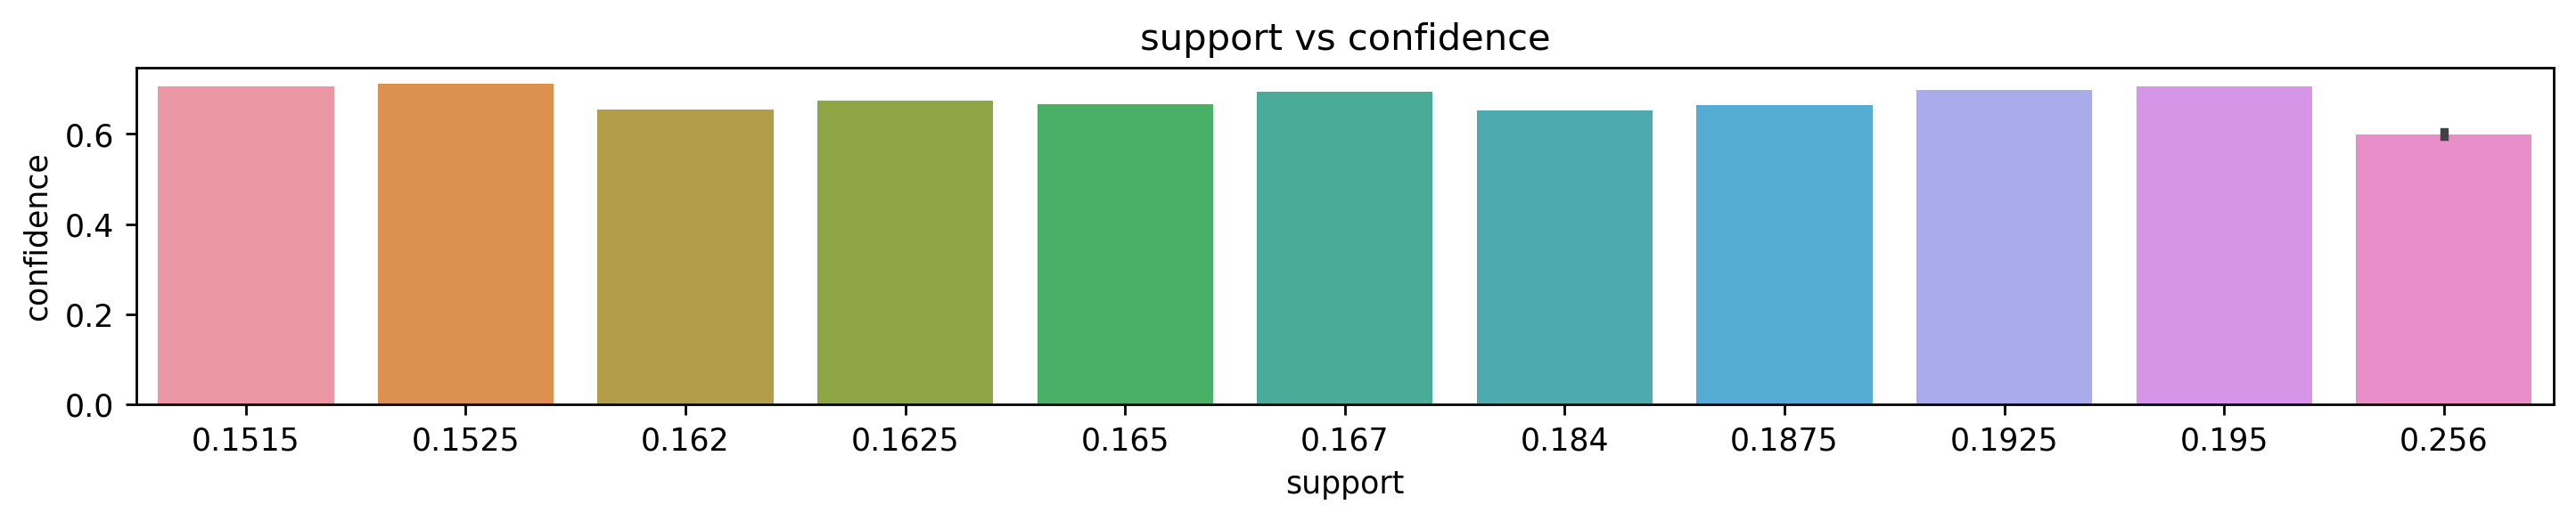

None


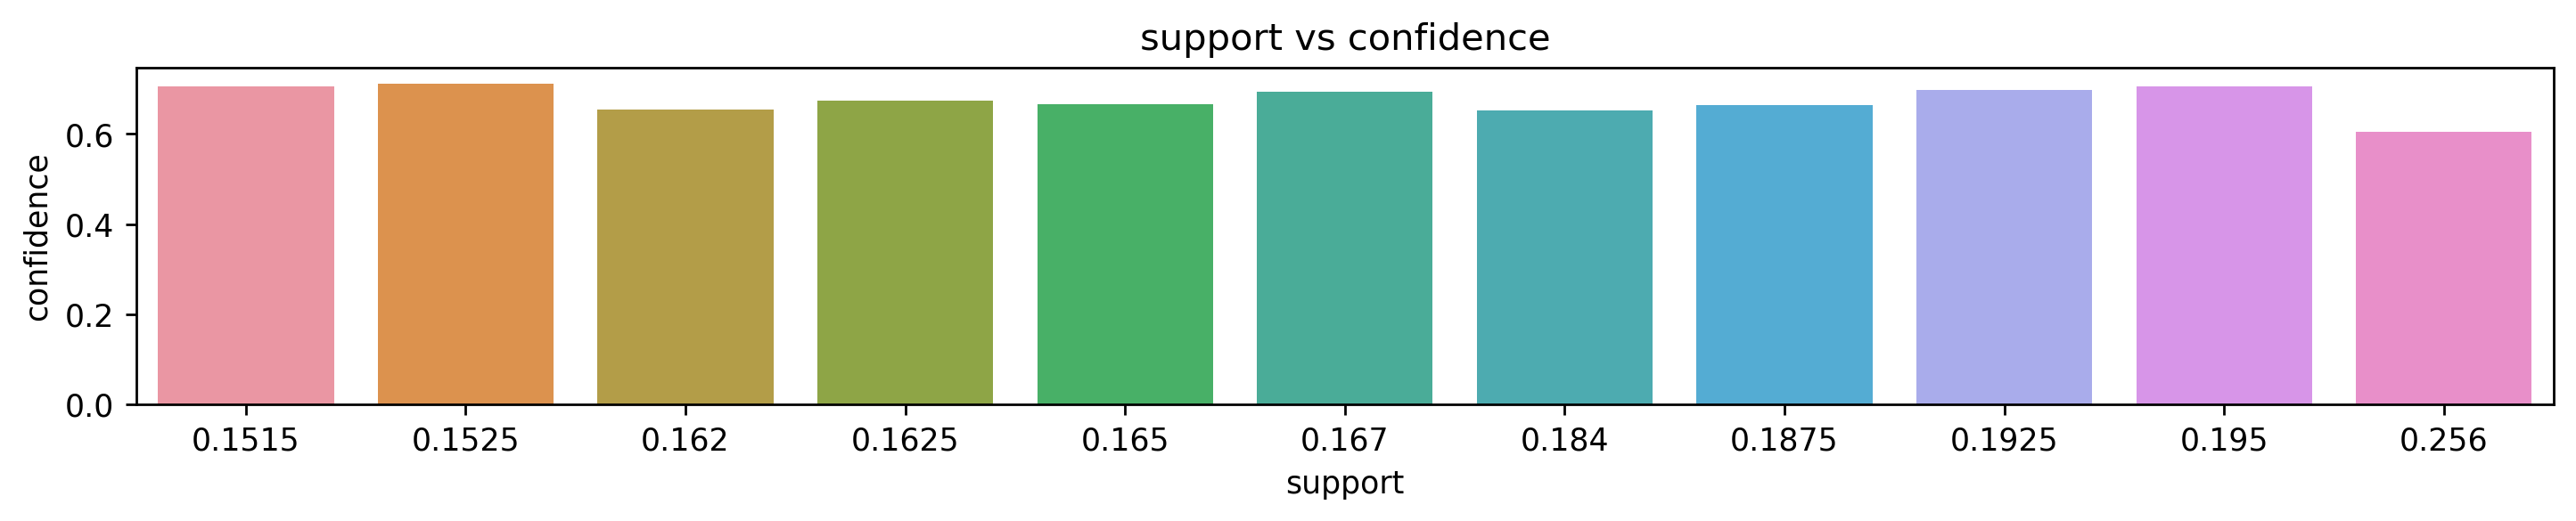

None


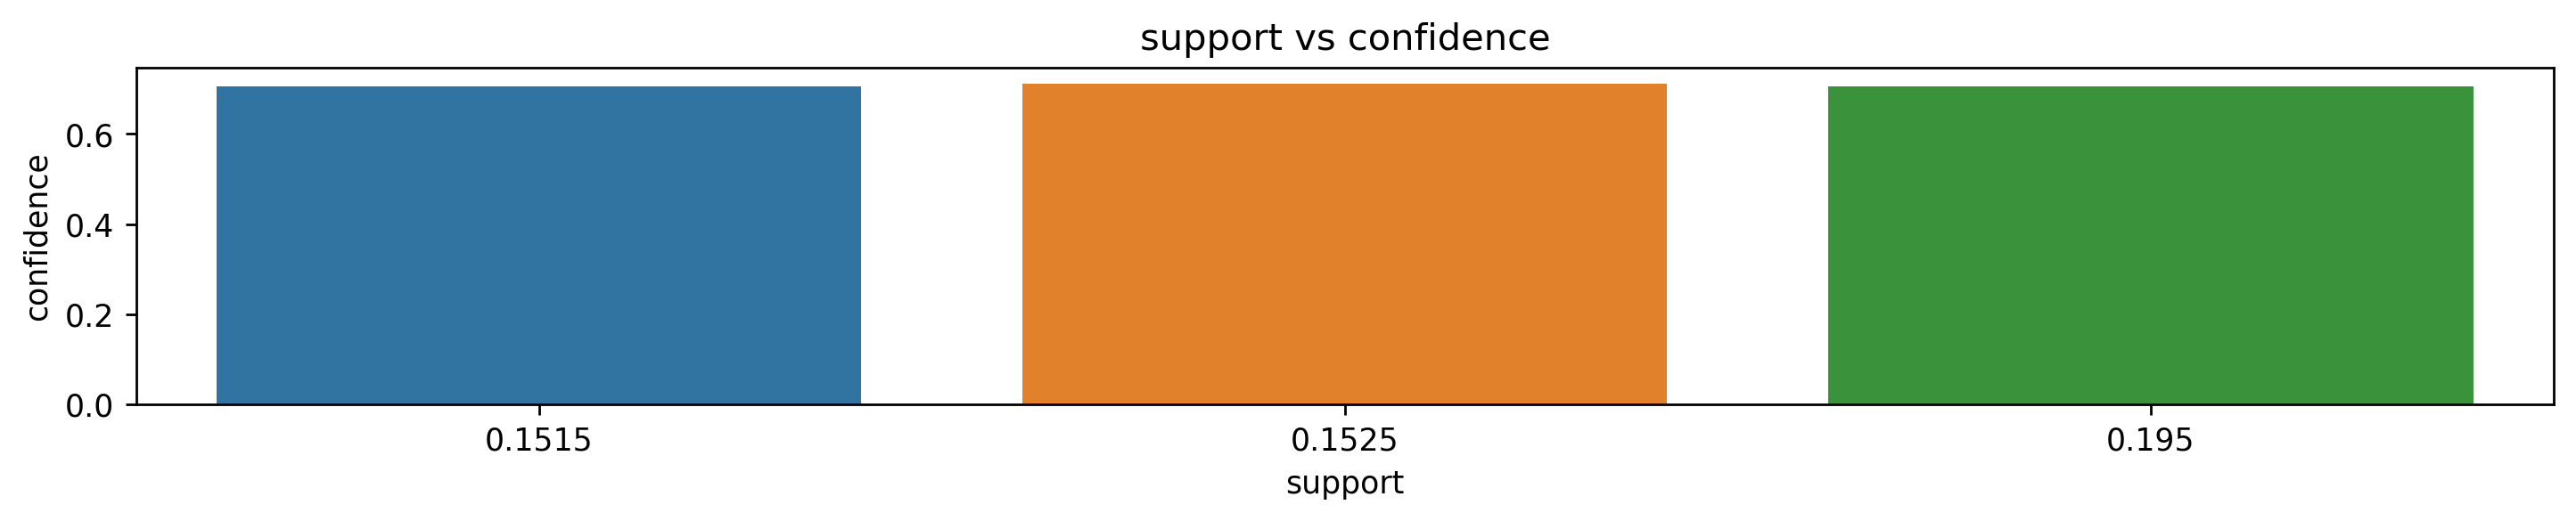

None


In [17]:
# Barplot for confidence vs support
lent=0,1,2,3,4
for i in lent:
    plt.figure(figsize=(14,2),dpi=250)
    sns.barplot("support","confidence",data=conf1[i])
    plt.title("support vs confidence")
    print(plt.show())

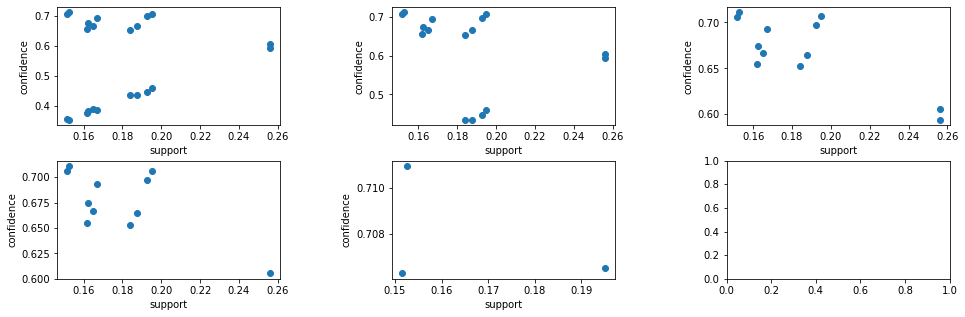

In [18]:
#scatter plot for visualization of relation between confidence and support
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2,ax3),(ax4,ax5,ax6) = axes
ax1.scatter(conf1[0]['support'],conf1[0]['confidence']),ax1.set_xlabel('support'),ax1.set_ylabel('confidence')
ax2.scatter(conf1[1]['support'],conf1[1]['confidence']),ax2.set_xlabel('support'),ax2.set_ylabel('confidence')
ax3.scatter(conf1[2]['support'],conf1[2]['confidence']),ax3.set_xlabel('support'),ax3.set_ylabel('confidence')
ax4.scatter(conf1[3]['support'],conf1[3]['confidence']),ax4.set_xlabel('support'),ax4.set_ylabel('confidence')
ax5.scatter(conf1[4]['support'],conf1[4]['confidence']),ax5.set_xlabel('support'),ax5.set_ylabel('confidence')
plt.show()

(Text(0.5, 0, 'lift'),
 Text(0, 0.5, 'Confidence'),
 Text(0.5, 1.0, 'lift vs Confidence'))

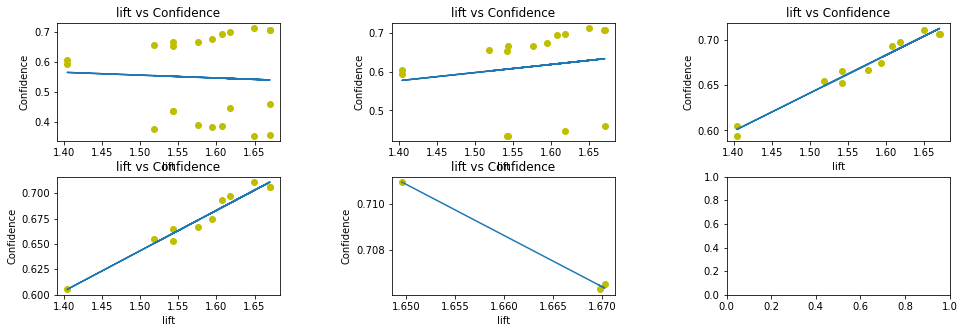

In [19]:
# polt of relatiob between confidence and lift
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2,ax3),(ax4,ax5,ax6) = axes 
fit = np.polyfit(conf1[0]['lift'], conf1[0]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax1.plot(conf1[0]['lift'], conf1[0]['confidence'], 'yo', conf1[0]['lift'],fit_fn(conf1[0]['lift']))
ax1.set_xlabel('lift'),ax1.set_ylabel('Confidence'),ax1.set_title('lift vs Confidence')
fit = np.polyfit(conf1[1]['lift'], conf1[1]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax2.plot(conf1[1]['lift'], conf1[1]['confidence'], 'yo', conf1[1]['lift'],fit_fn(conf1[1]['lift']))
ax2.set_xlabel('lift'),ax2.set_ylabel('Confidence'),ax2.set_title('lift vs Confidence')
fit = np.polyfit(conf1[2]['lift'], conf1[2]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax3.plot(conf1[2]['lift'], conf1[2]['confidence'], 'yo', conf1[2]['lift'],fit_fn(conf1[2]['lift']))
ax3.set_xlabel('lift'),ax3.set_ylabel('Confidence'),ax3.set_title('lift vs Confidence')
fit = np.polyfit(conf1[3]['lift'], conf1[3]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax4.plot(conf1[3]['lift'], conf1[3]['confidence'], 'yo', conf1[3]['lift'],fit_fn(conf1[3]['lift']))
ax4.set_xlabel('lift'),ax4.set_ylabel('Confidence'),ax4.set_title('lift vs Confidence')
fit = np.polyfit(conf1[4]['lift'], conf1[4]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax5.plot(conf1[4]['lift'], conf1[4]['confidence'], 'yo', conf1[4]['lift'],fit_fn(conf1[4]['lift']))
ax5.set_xlabel('lift'),ax5.set_ylabel('Confidence'),ax5.set_title('lift vs Confidence')

In [20]:
# finding support and length for itemsets with minimum support of 0.2
frequent_itemsets2=apriori(data,min_support=0.2,use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

C:\Users\hmaca\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


### At minimum support of 0.2 we obtained 3-item itemset

In [21]:
# Finding confidence for rules obtained with minimum support of 0.2
conf2=[]
confidence=0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
for n in confidence:
    rules2 = association_rules(frequent_itemsets2,metric='confidence', min_threshold=n)
    rules2.sort_values('lift',ascending=False)
    lift=rules2[rules2.lift>=1]
    print('No. of rules with confidence ',n,'is',rules2['confidence'].count(),
          'and no. of lift for those rules with ratio>=1 is',lift['lift'].count())
    conf2.append(rules2)

No. of rules with confidence  0.3 is 2 and no. of lift for those rules with ratio>=1 is 2
No. of rules with confidence  0.4 is 2 and no. of lift for those rules with ratio>=1 is 2
No. of rules with confidence  0.5 is 2 and no. of lift for those rules with ratio>=1 is 2
No. of rules with confidence  0.6 is 1 and no. of lift for those rules with ratio>=1 is 1
No. of rules with confidence  0.7 is 0 and no. of lift for those rules with ratio>=1 is 0
No. of rules with confidence  0.8 is 0 and no. of lift for those rules with ratio>=1 is 0
No. of rules with confidence  0.9 is 0 and no. of lift for those rules with ratio>=1 is 0
No. of rules with confidence  1 is 0 and no. of lift for those rules with ratio>=1 is 0


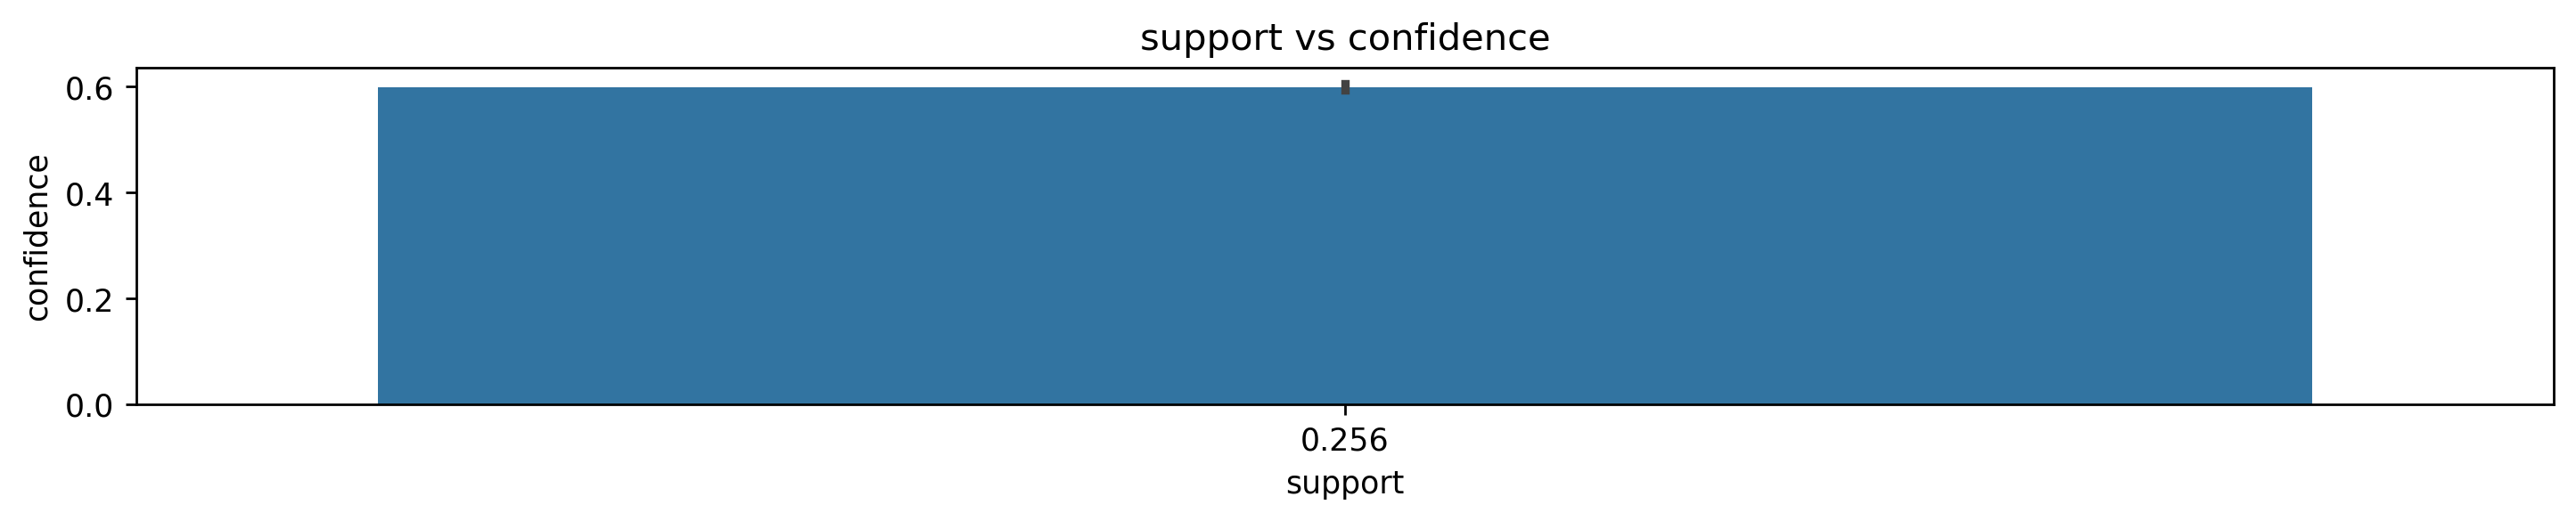

None


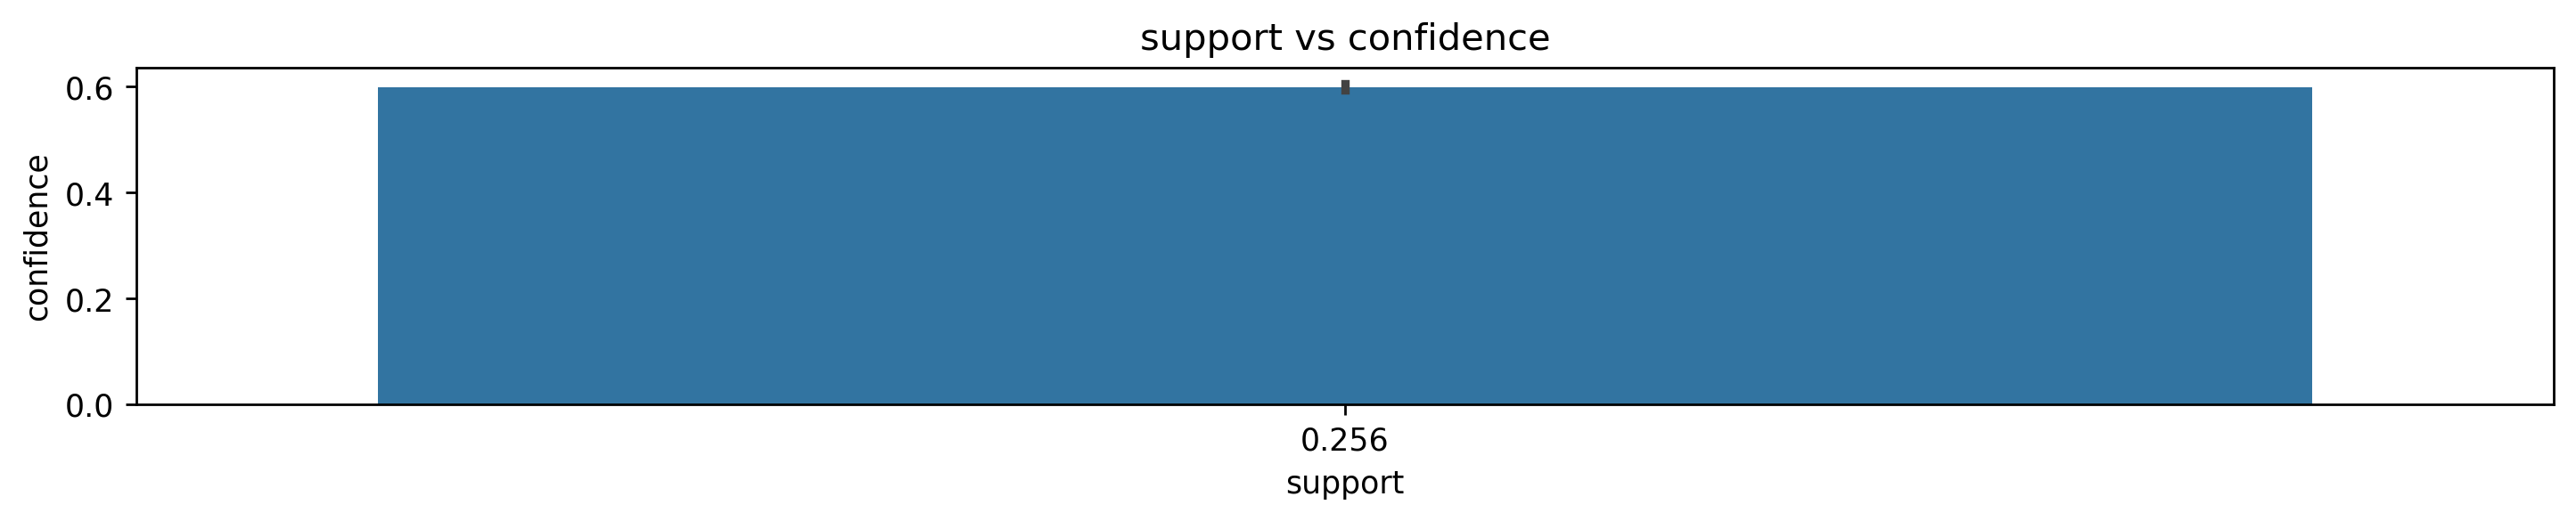

None


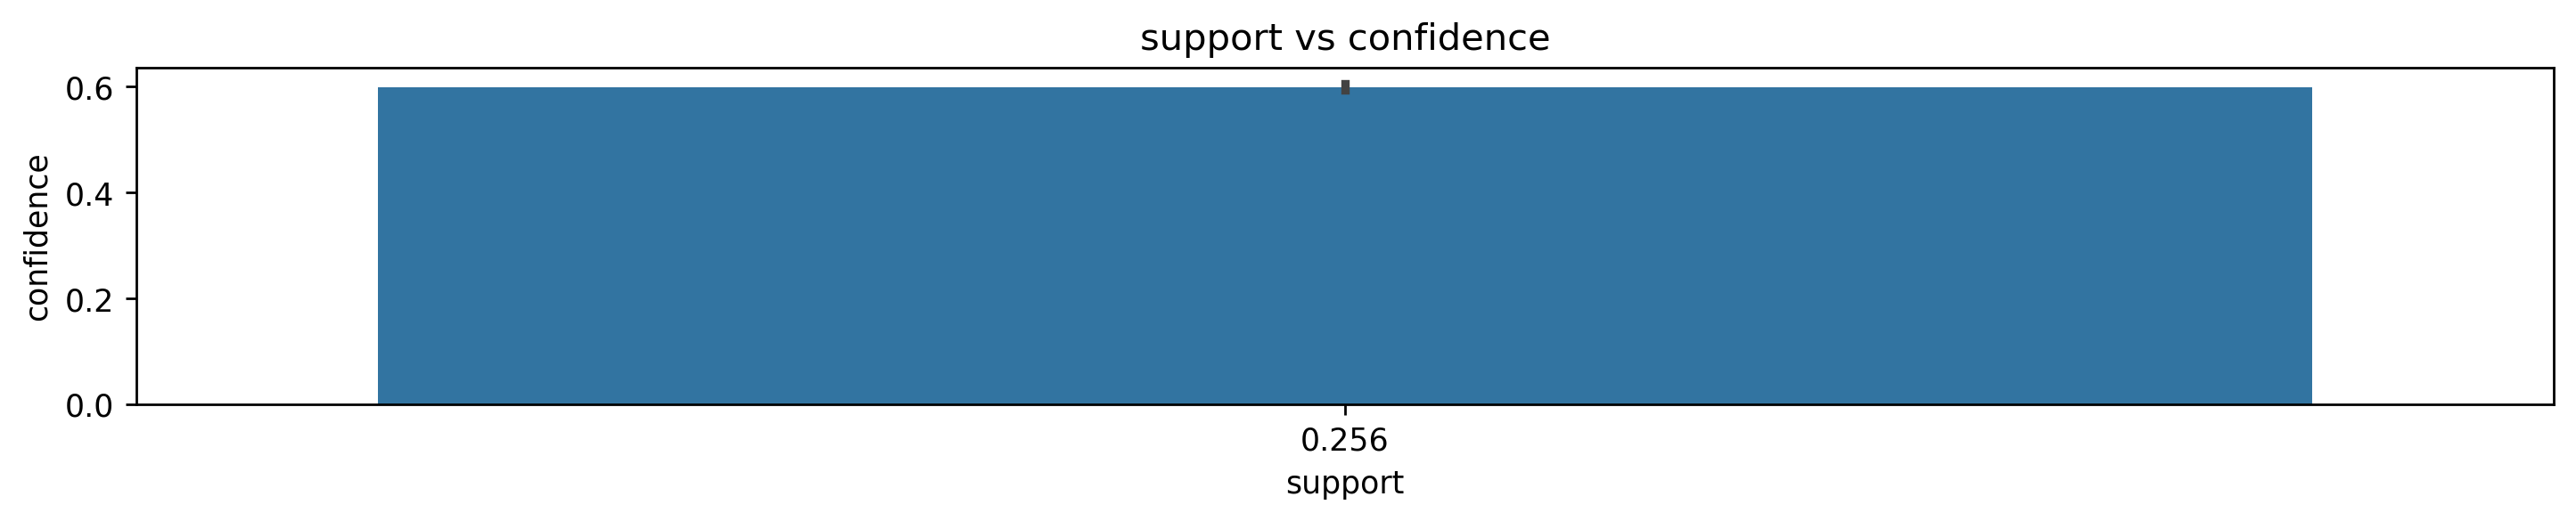

None


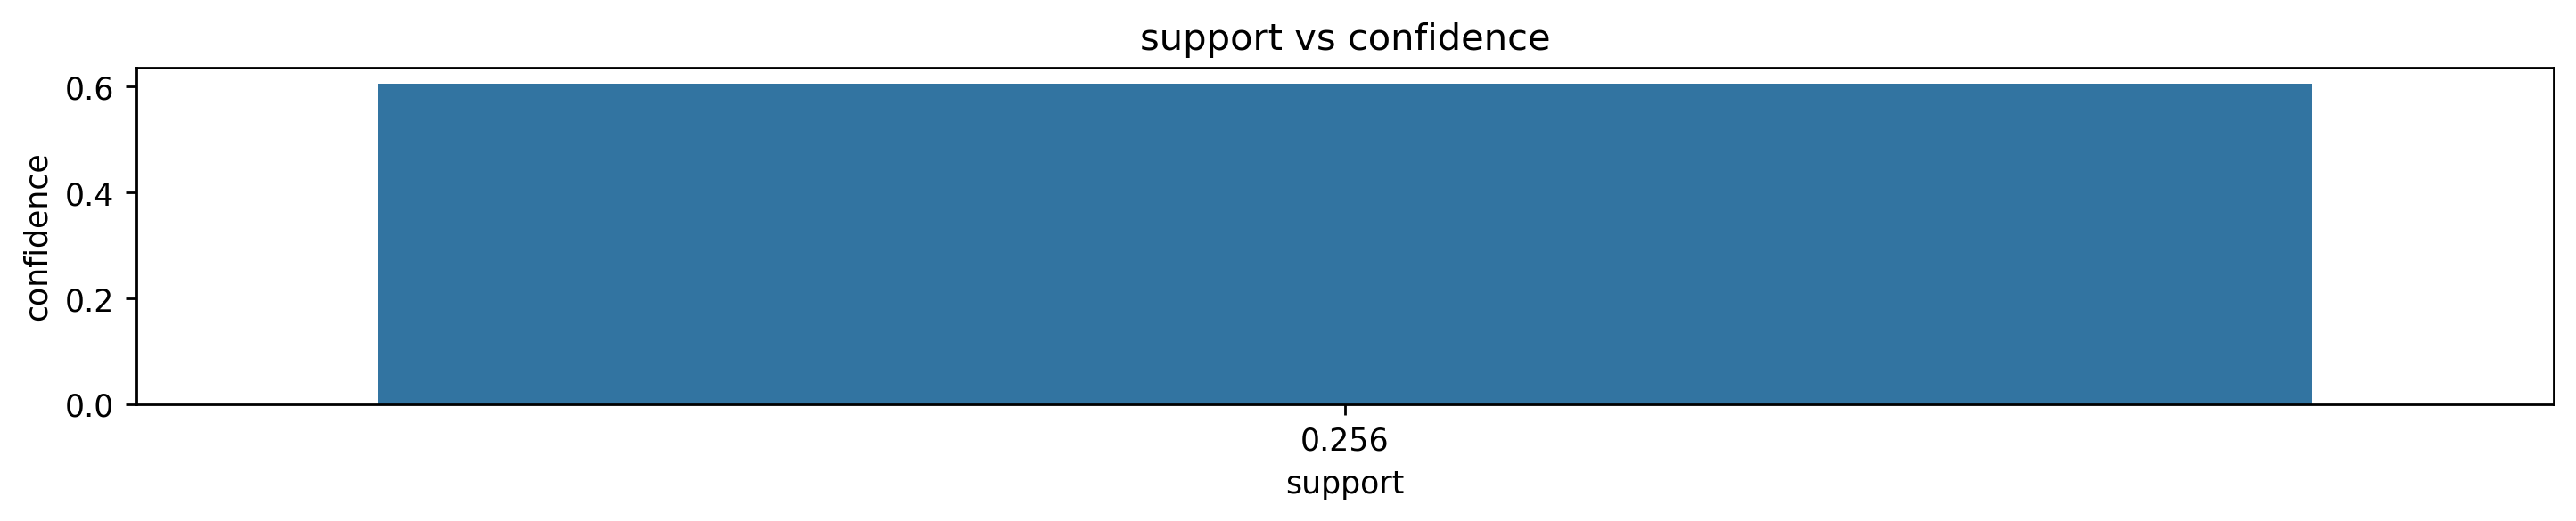

None


In [22]:
# Barplot for confidence vs support
lent=0,1,2,3
for i in lent:
    plt.figure(figsize=(14,2),dpi=250)
    sns.barplot("support","confidence",data=conf2[i])
    plt.title("support vs confidence")
    print(plt.show())

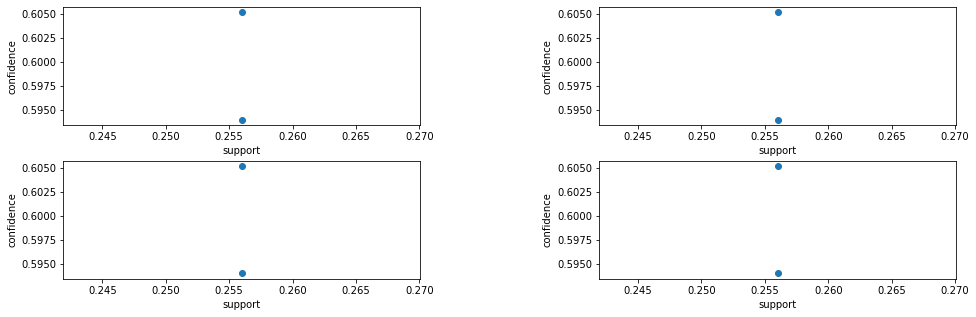

In [23]:
#scatter plot for visualization of relation between confidence and support
fig, axes = plt.subplots(2, 2, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2),(ax3,ax4) = axes
ax1.scatter(conf2[0]['support'],conf2[0]['confidence']),ax1.set_xlabel('support'),ax1.set_ylabel('confidence')
ax2.scatter(conf2[1]['support'],conf2[1]['confidence']),ax2.set_xlabel('support'),ax2.set_ylabel('confidence')
ax3.scatter(conf2[2]['support'],conf2[2]['confidence']),ax3.set_xlabel('support'),ax3.set_ylabel('confidence')
ax4.scatter(conf2[2]['support'],conf2[2]['confidence']),ax4.set_xlabel('support'),ax4.set_ylabel('confidence')
plt.show()

C:\Users\hmaca\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\hmaca\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\hmaca\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\hmaca\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(Text(0.5, 0, 'lift'),
 Text(0, 0.5, 'Confidence'),
 Text(0.5, 1.0, 'lift vs Confidence'))

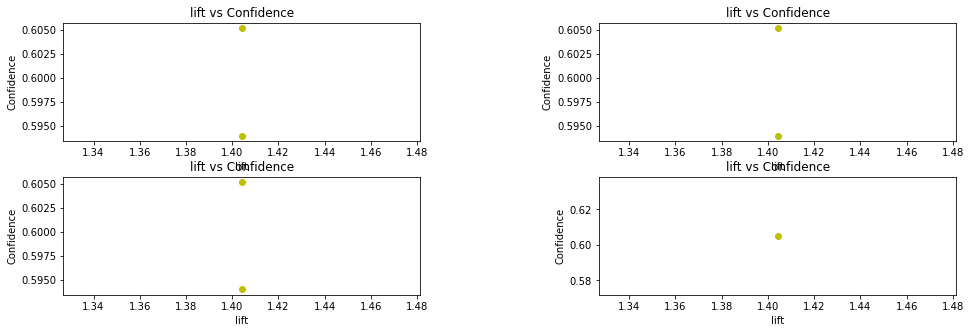

In [24]:
# polt of relatiob between confidence and lift
fig, axes = plt.subplots(2, 2, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2),(ax3,ax4) = axes 
fit = np.polyfit(conf2[0]['lift'], conf2[0]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax1.plot(conf2[0]['lift'], conf2[0]['confidence'], 'yo', conf2[0]['lift'],fit_fn(conf2[0]['lift']))
ax1.set_xlabel('lift'),ax1.set_ylabel('Confidence'),ax1.set_title('lift vs Confidence')
fit = np.polyfit(conf2[1]['lift'], conf2[1]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax2.plot(conf2[1]['lift'], conf2[1]['confidence'], 'yo', conf2[1]['lift'],fit_fn(conf2[1]['lift']))
ax2.set_xlabel('lift'),ax2.set_ylabel('Confidence'),ax2.set_title('lift vs Confidence')
fit = np.polyfit(conf2[2]['lift'], conf2[2]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax3.plot(conf2[2]['lift'], conf2[2]['confidence'], 'yo', conf2[2]['lift'],fit_fn(conf2[2]['lift']))
ax3.set_xlabel('lift'),ax3.set_ylabel('Confidence'),ax3.set_title('lift vs Confidence')
fit = np.polyfit(conf2[3]['lift'], conf2[3]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax4.plot(conf2[3]['lift'], conf2[3]['confidence'], 'yo', conf2[3]['lift'],fit_fn(conf2[3]['lift']))
ax4.set_xlabel('lift'),ax4.set_ylabel('Confidence'),ax4.set_title('lift vs Confidence')


#### As we observed that most of rules  have minimum support between 0.1 to 0.15 when confidence is <0.6
#### when we plot scatter plot we find that most of rules are lie in between support value of 0.1 to 0.15